In [15]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
path_to_results = os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ), "amiris_workflow")
path_to_structure = os.path.join(path_to_results, "amiris_data_structure.xlsx")
path_to_load = os.path.join(path_to_results, "amiris-config", "data","load.csv")
path_to_output = os.path.join(path_to_results, "output","amiris_results.csv" )
path_to_storage_levels = os.path.join(path_to_results, "output","final_storage_levels.csv" )
path_to_generation = os.path.join(path_to_results, "output","hourly_generation_per_group.csv" )
path_to_electricity_prices = os.path.join(path_to_results, "output","raw","EnergyExchangeMulti.csv" )
path_to_plots = os.path.join(os.getcwd(),  "Scenarios")

#-----------------------------------------------------------------------------
elec_prices_data = pd.read_csv(path_to_electricity_prices, sep=";")  
generation_data =  pd.read_csv(path_to_generation, index_col="Unnamed: 0")
load_data = pd.read_csv(path_to_load, sep=";", header=None) 
results_data = pd.read_csv(path_to_output) 
storage_levels_data = pd.read_csv(path_to_storage_levels) 
storages_data = pd.read_excel(path_to_structure, sheet_name='storages', index_col=0)
conventionals_data = pd.read_excel(path_to_structure, sheet_name='conventionals', index_col=0)
biogas_data = pd.read_excel(path_to_structure, sheet_name='biogas', index_col=0)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='index', ylabel='1'>

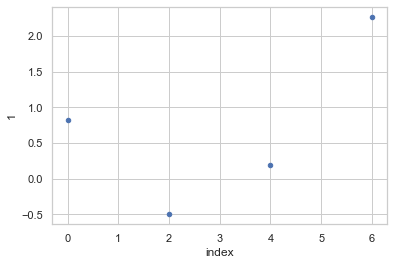

In [16]:
df = pd.DataFrame(np.random.randn(1, 4),
                   index=[1],
                   columns=list(range(0, 8, 2)))
df1 = df.transpose()
df1.reset_index().plot.scatter( x = "index" , y = 1)

In [17]:
conventionals_join = pd.merge(conventionals_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
storages_results = pd.merge(storages_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')

In [42]:
conventionals_join.head()

,identifier,FuelType,OpexVarInEURperMWH,Efficiency,BlockSizeInMW,InstalledPowerInMW,VARIABLE_COSTS_IN_EURO,REVENUES_IN_EURO,PRODUCTION_IN_MWH,CONTRIBUTION_MARGIN_IN_EURO
0,20250100021,BIOMASS,2,0.42,631,631,3.156052e+08,5.912634e+08,2.891670e+06,2.756582e+08
1,20510300042,NATURAL_GAS,4,0.61,1500,1500,9.413679e+08,9.977597e+08,4.173097e+06,5.639182e+07
2,20520300066,NATURAL_GAS,4,0.61,1500,1500,8.885515e+08,9.449433e+08,3.938961e+06,5.639182e+07
3,20520300065,NATURAL_GAS,4,0.61,1500,1500,8.322295e+08,8.886213e+08,3.689285e+06,5.639182e+07
4,20520300064,NATURAL_GAS,4,0.61,1500,1500,7.857241e+08,8.421159e+08,3.483126e+06,5.639182e+07


In [18]:
storages_results["InstalledPowerInMW"].sum()

14900

<AxesSubplot:>

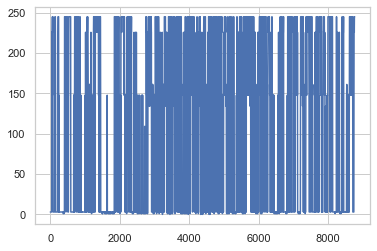

In [19]:
elec_prices_data["ElectricityPriceInEURperMWH"].plot()

In [20]:
elec_prices_data.head()

,AgentId,TimeStep,TotalAwardedPowerInMW,ElectricityPriceInEURperMWH,DispatchSystemCostInEUR
0,1,946080003,50550.813,3.0,98570.48996
1,1,946083603,50459.813,3.0,94566.48996
2,1,946087203,50199.313,3.0,89234.98996
3,1,946090803,49932.813,3.0,83339.48996
4,1,946094403,49679.313,3.0,78756.98996


In [21]:
storage_levels_data.head()

,Unnamed: 0,value
0,20482600036,35500.0
1,20502600030,1500.0
2,20512600055,7500.0
3,20512600057,7500.0
4,20512600060,7500.0


In [22]:
storages_results.head()

,identifier,StorageType,EnergyToPowerRatio,ChargingEfficiency,DischargingEfficiency,InitialEnergyLevelInMWH,InstalledPowerInMW,VARIABLE_COSTS_IN_EURO,REVENUES_IN_EURO,PRODUCTION_IN_MWH,CONTRIBUTION_MARGIN_IN_EURO
0,99992600008,STORAGE,5,0.92,0.92,0,1500,1.033674e+07,1.007759e+08,95744.048278,9.043915e+07
1,20512600055,STORAGE,5,0.92,0.92,0,1500,1.033674e+07,1.007759e+08,95744.048278,9.043915e+07
2,20512600057,STORAGE,5,0.92,0.92,0,1500,1.033674e+07,1.007759e+08,95744.048278,9.043915e+07
3,20512600060,STORAGE,5,0.92,0.92,0,1500,1.033674e+07,1.007759e+08,95744.048278,9.043915e+07
4,20512600061,STORAGE,5,0.92,0.92,0,1500,1.033674e+07,1.007759e+08,95744.048278,9.043915e+07


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='index', ylabel='value'>

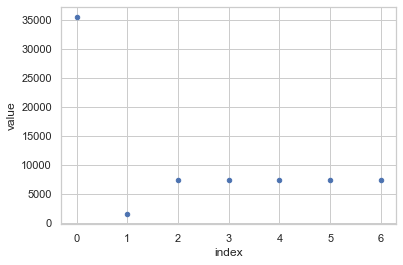

In [23]:
#storage_levels_data["value"][1:].plot.scatter() # 
storage_levels_data.reset_index().plot.scatter(x = 'index', y = 'value')

In [24]:
load_generation = pd.concat([generation_data, 
                      load_data],   axis=1 )
load_generation.drop(0, axis=1, inplace=True)
load_generation.sort_values(by=1, inplace=True) # sorting by increasing load
load_generation.reset_index(inplace=True )
load_generation.drop("index", axis=1, inplace=True)

In [25]:
#load_generation.rename(columns={1: "load" }, inplace=True)
load_generation["storages_charging"] = load_generation["storages_charging"]*-1
load_generation.drop("storages_aggregated_level", axis=1, inplace=True)
load_generation.drop(1, axis=1, inplace=True)
load_generation.head()

,res,conventionals,storages_discharging,storages_charging,load_shedding
0,25695.69968,21152.822687,1229.290633,-0.0,0.0
1,29350.64968,17551.622687,1229.290633,-0.0,0.0
2,29617.14968,17374.372687,1229.290633,-0.0,0.0
3,22734.29968,23493.019914,2071.493406,-0.0,0.0
4,35164.89968,13153.163320,0.000000,-0.0,0.0


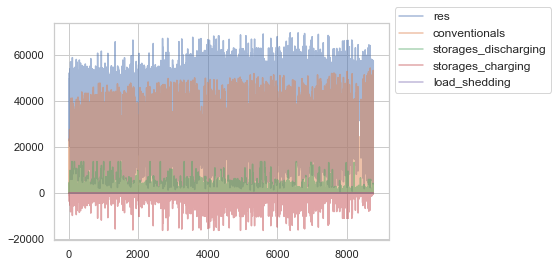

In [26]:
load_generation.plot(alpha=0.5)
axs1= plt.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
fig1 = axs1.get_figure()
fig1.savefig(path_to_plots + '/' + 'testing.png', bbox_inches='tight', dpi=300)

In [27]:
# plt.stackplot(load_generation.res, load_generation.conventionals, load_generation.load_shedding, load_generation.storages_discharging,
#               load_generation.storages_charging,
#               labels=['RES', 'conventional', "load shedding", "dish", "charg"])

In [28]:
storages = load_generation[["storages_charging", "storages_discharging"]].copy()

<AxesSubplot:>

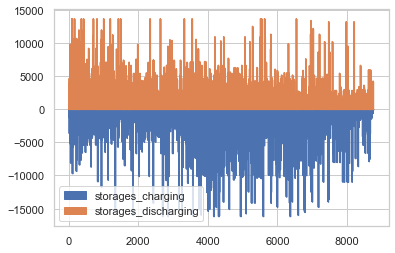

In [29]:
storages.plot.area()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


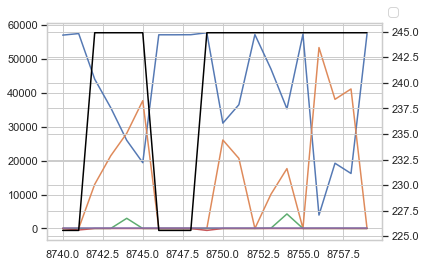

In [41]:
s = elec_prices_data["ElectricityPriceInEURperMWH" ]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
#load_generation.iloc[8740:8760,0:5].plot( axis = , alpha=0.95)

ax1.plot(load_generation.iloc[8740:8760,0:5] , alpha=0.95)
ax2.plot(s.loc[8740:8760] , color = "black")
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))


<AxesSubplot:>

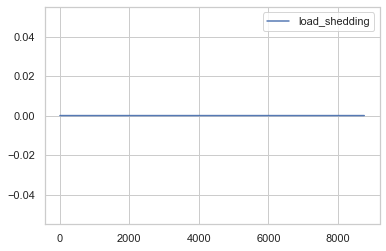

In [32]:
load_generation[["load_shedding"]].plot( alpha=0.95)

In [33]:
load_generation.head()

,res,conventionals,storages_discharging,storages_charging,load_shedding
0,25695.69968,21152.822687,1229.290633,-0.0,0.0
1,29350.64968,17551.622687,1229.290633,-0.0,0.0
2,29617.14968,17374.372687,1229.290633,-0.0,0.0
3,22734.29968,23493.019914,2071.493406,-0.0,0.0
4,35164.89968,13153.163320,0.000000,-0.0,0.0


In [34]:
conventionals_join.head()
conventional_production = conventionals_join["PRODUCTION_IN_MWH"].sum()
conventional_production_from_generation = load_generation["conventionals"].sum()
a = conventional_production - conventional_production_from_generation


In [35]:
storages_data.head()

,identifier,StorageType,EnergyToPowerRatio,ChargingEfficiency,DischargingEfficiency,InitialEnergyLevelInMWH,InstalledPowerInMW
0,99992600008,STORAGE,5,0.92,0.92,0,1500
1,20512600055,STORAGE,5,0.92,0.92,0,1500
2,20512600057,STORAGE,5,0.92,0.92,0,1500
3,20512600060,STORAGE,5,0.92,0.92,0,1500
4,20512600061,STORAGE,5,0.92,0.92,0,1500


In [36]:
conventional_production = conventionals_join["PRODUCTION_IN_MWH"].sum()
charging_from_generation = load_generation["storages_discharging"].sum()
